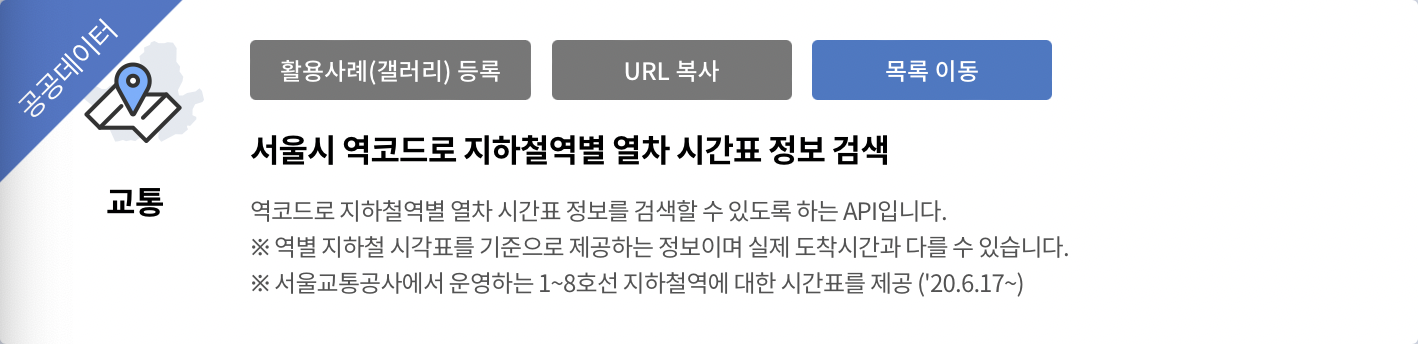

In [1]:
import requests
import xml.etree.ElementTree as ET
import pandas as pd

https://data.seoul.go.kr/dataList/OA-101/A/1/datasetView.do

In [21]:
url_gamnam = "http://openAPI.seoul.go.kr:8088/ your API key /xml/SearchSTNTimeTableByIDService/1/1000/0222/1/1/"
url_jamsil = "http://openAPI.seoul.go.kr:8088/ your API key /xml/SearchSTNTimeTableByIDService/1/1000/0216/1/1/"

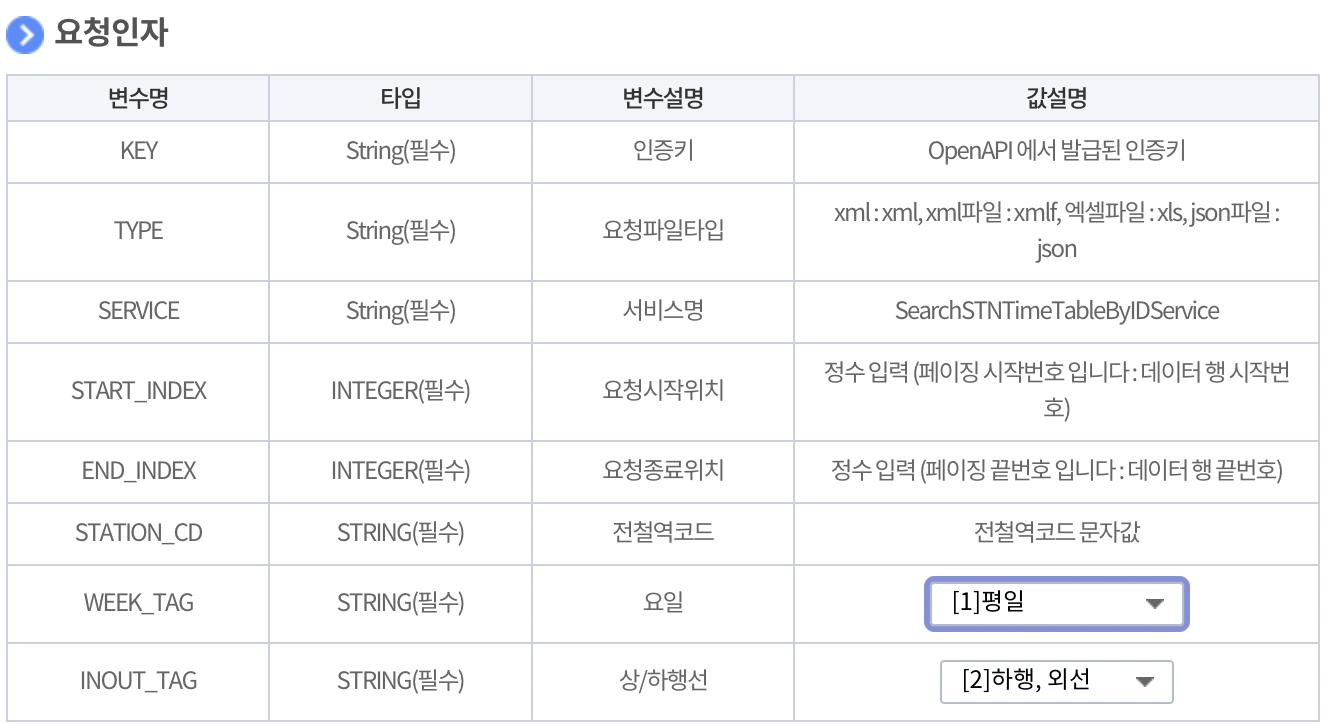

http://openAPI.seoul.go.kr:8088/  
\+ your API key  
\+ xml[xmlf, xls, json]  
\+ SearchSTNTimeTableByIDService  
\+ Start_idx 시작 페이지
\+ End_dix 종료 페이지  
\+ station_code 전철역 코드넘버  
\+ week_tag 요일 (1:평일, 2:토요일, 3:휴일&일요일)  
\+ inout_tag 상[하]향손 (1:상행, 2:하행)   

# 잠실역

In [3]:
response = requests.get(url_jamsil)

In [6]:
response

<Response [200]>

In [ ]:
response.status_code

200

In [10]:
len(response.text), response.text[:100]

(109442,
 '<?xml version="1.0" encoding="UTF-8"?>\n<SearchSTNTimeTableByIDService>\n<list_total_count>240</list_t')

In [11]:
root = ET.fromstring(response.text)

In [14]:
root, len(root.findall('.//row')) , root.findall('.//row')[:5]

(<Element 'SearchSTNTimeTableByIDService' at 0x7e0ff731c4a0>,
 240,
 [<Element 'row' at 0x7e0ff731c680>,
  <Element 'row' at 0x7e0ff731cc20>,
  <Element 'row' at 0x7e0ff731d1c0>,
  <Element 'row' at 0x7e0ff731d760>,
  <Element 'row' at 0x7e0ff731dd00>])

In [16]:
root.findall('.//row')[0].find('LINE_NUM'), root.findall('.//row')[0].find('LINE_NUM').text

(<Element 'LINE_NUM' at 0x7e0ff731c6d0>, '02호선')

In [18]:
# 필요한 정보를 추출하여 저장할 리스트 생성
subway_data = []

# <row> 요소를 순회하며 필요한 정보 추출
for row in root.findall(".//row"):
    line_num = row.find("LINE_NUM").text
    fr_code = row.find("FR_CODE").text
    station_cd = row.find("STATION_CD").text
    station_nm = row.find("STATION_NM").text
    train_no = row.find("TRAIN_NO").text
    arrival_time = row.find("ARRIVETIME").text
    left_time = row.find("LEFTTIME").text
    origin_station = row.find("ORIGINSTATION").text
    dest_station = row.find("DESTSTATION").text
    subway_sname = row.find("SUBWAYSNAME").text
    subway_ename = row.find("SUBWAYENAME").text
    week_tag = row.find("WEEK_TAG").text
    inout_tag = row.find("INOUT_TAG").text
    fl_flag = row.find("FL_FLAG").text
    dest_station2 = row.find("DESTSTATION2").text
    express_yn = row.find("EXPRESS_YN").text
    branch_line = row.find("BRANCH_LINE").text

    # 필요한 정보를 딕셔너리 형태로 저장
    subway_info = {
        "line_num": line_num,
        "fr_code": fr_code,
        "station_cd": station_cd,
        "station_nm": station_nm,
        "train_no": train_no,
        "arrival_time": arrival_time,
        "left_time": left_time,
        "origin_station": origin_station,
        "dest_station": dest_station,
        "subway_sname": subway_sname,
        "subway_ename": subway_ename,
        "week_tag": week_tag,
        "inout_tag": inout_tag,
        "fl_flag": fl_flag,
        "dest_station2": dest_station2,
        "express_yn": express_yn,
        "branch_line": branch_line
    }

    subway_data.append(subway_info)

In [19]:
# 추출한 정보 출력
for info in subway_data[:5]:
    print(info)

{'line_num': '02호선', 'fr_code': '216', 'station_cd': '0216', 'station_nm': '잠실', 'train_no': '2022', 'arrival_time': '05:40:00', 'left_time': '05:40:30', 'origin_station': '0211', 'dest_station': '0211', 'subway_sname': '성수', 'subway_ename': '성수', 'week_tag': '1', 'inout_tag': '1', 'fl_flag': None, 'dest_station2': None, 'express_yn': 'G', 'branch_line': None}
{'line_num': '02호선', 'fr_code': '216', 'station_cd': '0216', 'station_nm': '잠실', 'train_no': '2026', 'arrival_time': '05:50:00', 'left_time': '05:50:30', 'origin_station': '0211', 'dest_station': '0211', 'subway_sname': '성수', 'subway_ename': '성수', 'week_tag': '1', 'inout_tag': '1', 'fl_flag': None, 'dest_station2': None, 'express_yn': 'G', 'branch_line': None}
{'line_num': '02호선', 'fr_code': '216', 'station_cd': '0216', 'station_nm': '잠실', 'train_no': '2028', 'arrival_time': '05:57:00', 'left_time': '05:57:30', 'origin_station': '0211', 'dest_station': '0211', 'subway_sname': '성수', 'subway_ename': '성수', 'week_tag': '1', 'inout_ta

In [ ]:
df = pd.DataFrame(subway_data)
df

,line_num,fr_code,station_cd,station_nm,train_no,arrival_time,left_time,origin_station,dest_station,subway_sname,subway_ename,week_tag,inout_tag,fl_flag,dest_station2,express_yn,branch_line
0,02호선,216,0216,잠실,2022,05:40:00,05:40:30,0211,0211,성수,성수,1,1,None,None,G,None
1,02호선,216,0216,잠실,2026,05:50:00,05:50:30,0211,0211,성수,성수,1,1,None,None,G,None
2,02호선,216,0216,잠실,2028,05:57:00,05:57:30,0211,0211,성수,성수,1,1,None,None,G,None
3,02호선,216,0216,잠실,2030,06:04:00,06:04:30,0211,0211,성수,성수,1,1,None,None,G,None
4,02호선,216,0216,잠실,2032,06:08:00,06:08:30,0211,0211,성수,성수,1,1,None,None,G,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,02호선,216,0216,잠실,2512,23:57:00,23:57:30,0211,0202,성수,을지로입구,1,1,None,None,G,None
236,02호선,216,0216,잠실,2514,24:09:00,24:09:30,0211,0239,성수,홍대입구,1,1,None,None,G,None
237,02호선,216,0216,잠실,2516,24:21:00,24:21:30,0211,0234,성수,신도림,1,1,None,None,G,None
238,02호선,216,0216,잠실,2518,24:34:00,24:34:30,0211,0228,성수,서울대입구,1,1,None,None,G,None


In [ ]:
df.columns

Index(['line_num', 'fr_code', 'station_cd', 'station_nm', 'train_no',
       'arrival_time', 'left_time', 'origin_station', 'dest_station',
       'subway_sname', 'subway_ename', 'week_tag', 'inout_tag', 'fl_flag',
       'dest_station2', 'express_yn', 'branch_line'],
      dtype='object')

In [ ]:
subway_columns = ['fr_code','station_cd','train_no', 'arrival_time', 'left_time', 'origin_station', 'dest_station', 'subway_sname', 'subway_ename','week_tag', 'inout_tag', 'fl_flag', 'express_yn']

In [ ]:
len(subway_columns)

13

In [ ]:
df[subway_columns]

,fr_code,station_cd,train_no,arrival_time,left_time,origin_station,dest_station,subway_sname,subway_ename,week_tag,inout_tag,fl_flag,express_yn
0,216,0216,2022,05:40:00,05:40:30,0211,0211,성수,성수,1,1,None,G
1,216,0216,2026,05:50:00,05:50:30,0211,0211,성수,성수,1,1,None,G
2,216,0216,2028,05:57:00,05:57:30,0211,0211,성수,성수,1,1,None,G
3,216,0216,2030,06:04:00,06:04:30,0211,0211,성수,성수,1,1,None,G
4,216,0216,2032,06:08:00,06:08:30,0211,0211,성수,성수,1,1,None,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,216,0216,2512,23:57:00,23:57:30,0211,0202,성수,을지로입구,1,1,None,G
236,216,0216,2514,24:09:00,24:09:30,0211,0239,성수,홍대입구,1,1,None,G
237,216,0216,2516,24:21:00,24:21:30,0211,0234,성수,신도림,1,1,None,G
238,216,0216,2518,24:34:00,24:34:30,0211,0228,성수,서울대입구,1,1,None,G


In [ ]:
df[subway_columns].to_csv('jamsil_time_table.csv', index=False, encoding='utf-8-sig')

---
---


# 강남


In [ ]:
url_gamnam = "http://openAPI.seoul.go.kr:8088/ your API /xml/SearchSTNTimeTableByIDService/1/1000/0222/1/1/"

In [22]:
response = requests.get(url_gamnam)

In [ ]:
response.status_code

200

In [ ]:
response.content

b'<RESULT><CODE>INFO-100</CODE><MESSAGE><![CDATA[\xec\x9d\xb8\xec\xa6\x9d\xed\x82\xa4\xea\xb0\x80 \xec\x9c\xa0\xed\x9a\xa8\xed\x95\x98\xec\xa7\x80 \xec\x95\x8a\xec\x8a\xb5\xeb\x8b\x88\xeb\x8b\xa4.\n\xec\x9d\xb8\xec\xa6\x9d\xed\x82\xa4\xea\xb0\x80 \xec\x97\x86\xeb\x8a\x94 \xea\xb2\xbd\xec\x9a\xb0, \xec\x97\xb4\xeb\xa6\xb0 \xeb\x8d\xb0\xec\x9d\xb4\xed\x84\xb0 \xea\xb4\x91\xec\x9e\xa5 \xed\x99\x88\xed\x8e\x98\xec\x9d\xb4\xec\xa7\x80\xec\x97\x90\xec\x84\x9c \xec\x9d\xb8\xec\xa6\x9d\xed\x82\xa4\xeb\xa5\xbc \xec\x8b\xa0\xec\xb2\xad\xed\x95\x98\xec\x8b\xad\xec\x8b\x9c\xec\x98\xa4.]]></MESSAGE></RESULT>'

In [23]:
root = ET.fromstring(response.text)

In [ ]:
root

<Element 'SearchSTNTimeTableByIDService' at 0x7c223ca8e480>

In [24]:
# 필요한 정보를 추출하여 저장할 리스트 생성
subway_data = []

# <row> 요소를 순회하며 필요한 정보 추출
for row in root.findall(".//row"):
    line_num = row.find("LINE_NUM").text
    fr_code = row.find("FR_CODE").text
    station_cd = row.find("STATION_CD").text
    station_nm = row.find("STATION_NM").text
    train_no = row.find("TRAIN_NO").text
    arrival_time = row.find("ARRIVETIME").text
    left_time = row.find("LEFTTIME").text
    origin_station = row.find("ORIGINSTATION").text
    dest_station = row.find("DESTSTATION").text
    subway_sname = row.find("SUBWAYSNAME").text
    subway_ename = row.find("SUBWAYENAME").text
    week_tag = row.find("WEEK_TAG").text
    inout_tag = row.find("INOUT_TAG").text
    fl_flag = row.find("FL_FLAG").text
    dest_station2 = row.find("DESTSTATION2").text
    express_yn = row.find("EXPRESS_YN").text
    branch_line = row.find("BRANCH_LINE").text

    # 필요한 정보를 딕셔너리 형태로 저장
    subway_info = {
        "line_num": line_num,
        "fr_code": fr_code,
        "station_cd": station_cd,
        "station_nm": station_nm,
        "train_no": train_no,
        "arrival_time": arrival_time,
        "left_time": left_time,
        "origin_station": origin_station,
        "dest_station": dest_station,
        "subway_sname": subway_sname,
        "subway_ename": subway_ename,
        "week_tag": week_tag,
        "inout_tag": inout_tag,
        "fl_flag": fl_flag,
        "dest_station2": dest_station2,
        "express_yn": express_yn,
        "branch_line": branch_line
    }

    subway_data.append(subway_info)

In [25]:
# 추출한 정보 출력
for info in subway_data[:5]:
    print(info)

{'line_num': '02호선', 'fr_code': '222', 'station_cd': '0222', 'station_nm': '강남', 'train_no': '2016', 'arrival_time': '05:35:30', 'left_time': '05:36:00', 'origin_station': '0219', 'dest_station': '0211', 'subway_sname': '삼성', 'subway_ename': '성수', 'week_tag': '1', 'inout_tag': '1', 'fl_flag': None, 'dest_station2': None, 'express_yn': 'G', 'branch_line': None}
{'line_num': '02호선', 'fr_code': '222', 'station_cd': '0222', 'station_nm': '강남', 'train_no': '2022', 'arrival_time': '05:52:00', 'left_time': '05:52:30', 'origin_station': '0211', 'dest_station': '0211', 'subway_sname': '성수', 'subway_ename': '성수', 'week_tag': '1', 'inout_tag': '1', 'fl_flag': None, 'dest_station2': None, 'express_yn': 'G', 'branch_line': None}
{'line_num': '02호선', 'fr_code': '222', 'station_cd': '0222', 'station_nm': '강남', 'train_no': '2026', 'arrival_time': '06:02:00', 'left_time': '06:02:30', 'origin_station': '0211', 'dest_station': '0211', 'subway_sname': '성수', 'subway_ename': '성수', 'week_tag': '1', 'inout_ta

In [ ]:
df = pd.DataFrame(subway_data)
df

,line_num,fr_code,station_cd,station_nm,train_no,arrival_time,left_time,origin_station,dest_station,subway_sname,subway_ename,week_tag,inout_tag,fl_flag,dest_station2,express_yn,branch_line
0,02호선,222,0222,강남,2016,05:35:30,05:36:00,0219,0211,삼성,성수,1,1,None,None,G,None
1,02호선,222,0222,강남,2022,05:52:00,05:52:30,0211,0211,성수,성수,1,1,None,None,G,None
2,02호선,222,0222,강남,2026,06:02:00,06:02:30,0211,0211,성수,성수,1,1,None,None,G,None
3,02호선,222,0222,강남,2028,06:09:00,06:09:30,0211,0211,성수,성수,1,1,None,None,G,None
4,02호선,222,0222,강남,2030,06:16:00,06:16:30,0211,0211,성수,성수,1,1,None,None,G,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,02호선,222,0222,강남,2510,24:00:00,24:00:30,0211,0234,성수,신도림,1,1,None,None,G,None
236,02호선,222,0222,강남,2512,24:09:00,24:09:30,0211,0202,성수,을지로입구,1,1,None,None,G,None
237,02호선,222,0222,강남,2514,24:21:00,24:21:30,0211,0239,성수,홍대입구,1,1,None,None,G,None
238,02호선,222,0222,강남,2516,24:33:00,24:33:30,0211,0234,성수,신도림,1,1,None,None,G,None


In [ ]:
df.columns

Index(['line_num', 'fr_code', 'station_cd', 'station_nm', 'train_no',
       'arrival_time', 'left_time', 'origin_station', 'dest_station',
       'subway_sname', 'subway_ename', 'week_tag', 'inout_tag', 'fl_flag',
       'dest_station2', 'express_yn', 'branch_line'],
      dtype='object')

In [ ]:
subway_columns = ['fr_code','station_cd','train_no', 'arrival_time', 'left_time', 'origin_station', 'dest_station', 'subway_sname', 'subway_ename','week_tag', 'inout_tag', 'fl_flag', 'express_yn']

In [ ]:
len(subway_columns)

13

In [ ]:
df[subway_columns]

,fr_code,station_cd,train_no,arrival_time,left_time,origin_station,dest_station,subway_sname,subway_ename,week_tag,inout_tag,fl_flag,express_yn
0,222,0222,2016,05:35:30,05:36:00,0219,0211,삼성,성수,1,1,None,G
1,222,0222,2022,05:52:00,05:52:30,0211,0211,성수,성수,1,1,None,G
2,222,0222,2026,06:02:00,06:02:30,0211,0211,성수,성수,1,1,None,G
3,222,0222,2028,06:09:00,06:09:30,0211,0211,성수,성수,1,1,None,G
4,222,0222,2030,06:16:00,06:16:30,0211,0211,성수,성수,1,1,None,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,222,0222,2510,24:00:00,24:00:30,0211,0234,성수,신도림,1,1,None,G
236,222,0222,2512,24:09:00,24:09:30,0211,0202,성수,을지로입구,1,1,None,G
237,222,0222,2514,24:21:00,24:21:30,0211,0239,성수,홍대입구,1,1,None,G
238,222,0222,2516,24:33:00,24:33:30,0211,0234,성수,신도림,1,1,None,G


In [ ]:
df[subway_columns].to_csv('gangnam_time_table.csv', index=False, encoding='utf-8-sig')

# 지하철 식별 코드  
https://data.seoul.go.kr/dataList/OA-121/S/1/datasetView.do

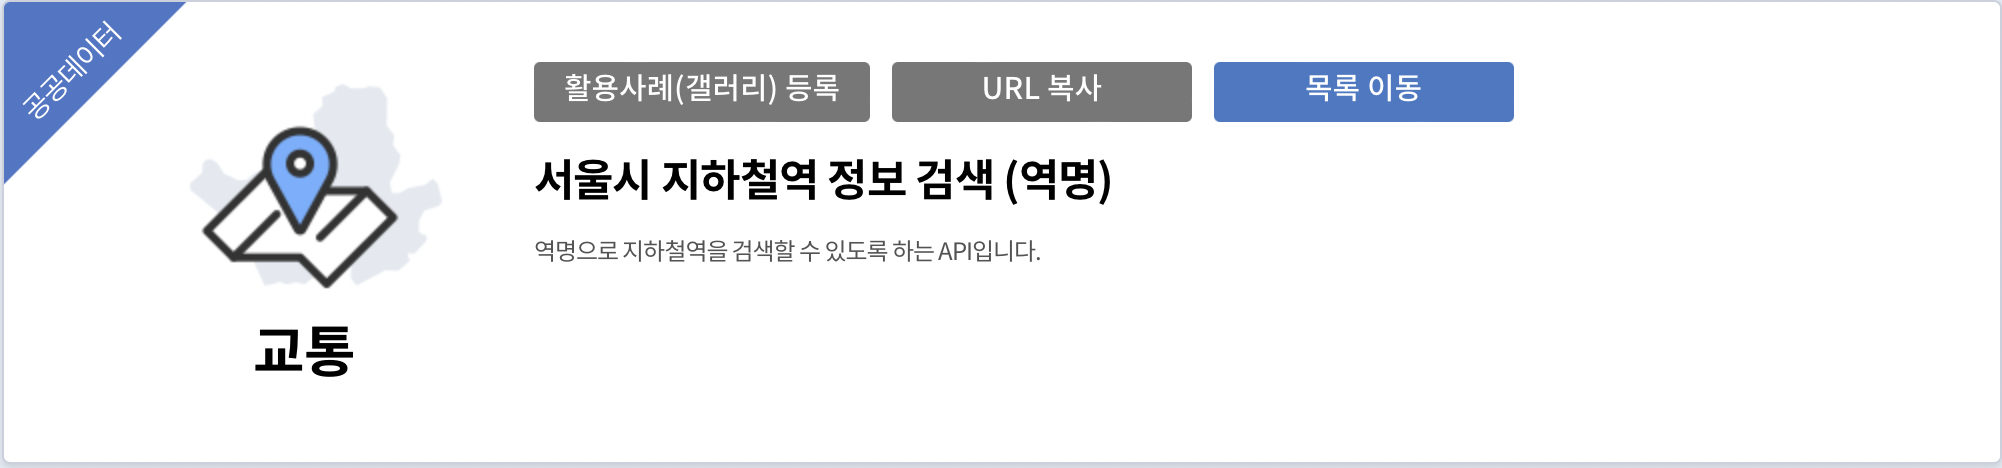

In [ ]:
sub_df = pd.read_csv('subway_find2.csv', encoding='utf-8')
sub_df

,전철역코드,전철역명,호선,외부코드
0,244,용답,02호선,211-1
1,245,신답,02호선,211-2
2,250,용두,02호선,211-3
3,336,학여울,03호선,346
4,428,삼각지,04호선,428
...,...,...,...,...
772,159,동묘앞,01호선,127
773,200,까치산,02호선,234-4
774,201,시청,02호선,201
775,202,을지로입구,02호선,202


In [ ]:
line2_df = sub_df[sub_df['호선'] == '02호선']
line2_df

,전철역코드,전철역명,호선,외부코드
0,244,용답,02호선,211-1
1,245,신답,02호선,211-2
2,250,용두,02호선,211-3
40,248,양천구청,02호선,234-2
52,216,잠실,02호선,216
53,249,신정네거리,02호선,234-3
65,233,대림,02호선,233
66,237,당산,02호선,237
123,217,잠실새내,02호선,217
142,218,종합운동장,02호선,218


In [ ]:
line2_df = line2_df[['전철역명', '전철역코드', '외부코드']]
line2_df

,전철역명,전철역코드,외부코드
0,용답,244,211-1
1,신답,245,211-2
2,용두,250,211-3
40,양천구청,248,234-2
52,잠실,216,216
53,신정네거리,249,234-3
65,대림,233,233
66,당산,237,237
123,잠실새내,217,217
142,종합운동장,218,218


In [ ]:
line2_df = line2_df.sort_values(by='전철역명', ascending=True)
line2_df

,전철역명,전철역코드,외부코드
275,강남,222,222
300,강변,214,214
298,건대입구,212,212
276,교대,223,223
285,구로디지털단지,232,232
299,구의,213,213
773,까치산,200,234-4
280,낙성대,227,227
66,당산,237,237
65,대림,233,233


In [ ]:
line2_df.to_csv('line2_stationCode.csv', index=False, encoding='utf-8-sig')